## Import Packages


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
from sklearn.model_selection import train_test_split

warnings.filterwarnings("ignore", category=FutureWarning)

## Load Dataset


In [2]:
penguins_df = pd.read_csv("../archive/penguins.csv")

## Examine dataset

In [3]:
# penguins_df
# penguins_df.shape
# penguins_df.head(n=10)
# penguins_df.tail(n=10)
# penguins_df.describe
# penguins_df.columns
penguins_df.isnull().sum()
# penguins_df.dtypes

culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64

## Dealing with null values and outliers


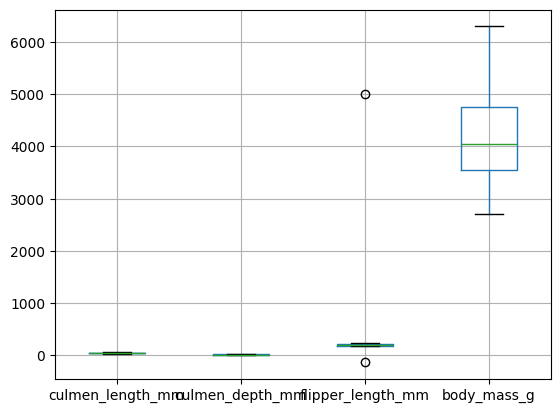

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
4,36.7,19.3,193.0,3450.0,FEMALE
5,39.3,20.6,190.0,3650.0,MALE


In [4]:
penguins_df.boxplot()
plt.show()
penguins_df = penguins_df.dropna()
penguins_df[penguins_df["flipper_length_mm"] > 4000]
penguins_df[penguins_df["flipper_length_mm"] < 0]

# Näytä ne rivit joissa oli jotai kreisejä arvoja.
# penguins_df.loc[[9, 14]]

penguins_clean = penguins_df.drop([9, 14])
penguins_clean.head()

## Perform preprocessing steps on the dataset to create dummy variables


In [5]:
df = pd.get_dummies(penguins_clean).drop("sex_.", axis=1)
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,False,True
1,39.5,17.4,186.0,3800.0,True,False
2,40.3,18.0,195.0,3250.0,True,False
4,36.7,19.3,193.0,3450.0,True,False
5,39.3,20.6,190.0,3650.0,False,True


## Perform preprocessing steps on the dataset - scaling


In [6]:
scaler = StandardScaler()
X = scaler.fit_transform(df)
penguins_preprocessed = pd.DataFrame(data=X, columns=df.columns)
penguins_preprocessed.head(10)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,-0.905520,0.793126,-1.428125,-0.569709,-0.991031,0.997001
1,-0.831938,0.128503,-1.071522,-0.507579,1.009050,-1.003008
2,-0.684775,0.435252,-0.429637,-1.191006,1.009050,-1.003008
3,-1.347011,1.099875,-0.572278,-0.942487,1.009050,-1.003008
4,-0.868729,1.764498,-0.786240,-0.693968,-0.991031,0.997001
5,-0.942311,0.333002,-1.428125,-0.725033,1.009050,-1.003008
6,-0.887125,1.253249,-0.429637,0.579691,-0.991031,0.997001
7,-0.537611,0.230753,-1.356804,-1.253136,1.009050,-1.003008
8,-0.997497,2.071247,-0.714919,-0.507579,-0.991031,0.997001
9,-1.365406,0.333002,-1.142843,-0.631839,1.009050,-1.003008


## PCA version

In [7]:
# pca = PCA(n_components=None)
# dfx_pca = pca.fit(penguins_preprocessed)
# dfx_pca.explained_variance_ratio_
# n_components = sum(dfx_pca.explained_variance_ratio_ > 0.1)
# pca = PCA(n_components=n_components)
# penguins_PCA = pca.fit_transform(penguins_preprocessed)
# print(n_components)



## Detect the optimal number of clusters for k-means clustering

# inertia = []
# for k in range(1, 10):
#     kmeans = KMeans(n_clusters=k, random_state=42).fit(penguins_PCA)
#     inertia.append(kmeans.inertia_)
# plt.plot(range(1, 10), inertia, marker="o")
# plt.xlabel("Number of clusters")
# plt.ylabel("Inertia")
# plt.title("Elbow Method")
# plt.show()
# n_clusters = 4

## Run the k-means clustering algorithm

# kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(penguins_PCA)
# plt.scatter(penguins_PCA[:, 0], penguins_PCA[:, 1], c=kmeans.labels_, cmap="viridis")
# plt.xlabel("First Principal Component")
# plt.ylabel("Second Principal Component")
# plt.title(f"K-means Clustering (K={n_clusters})")
# plt.show()

## Detect the optimal number of clusters for k-means clustering

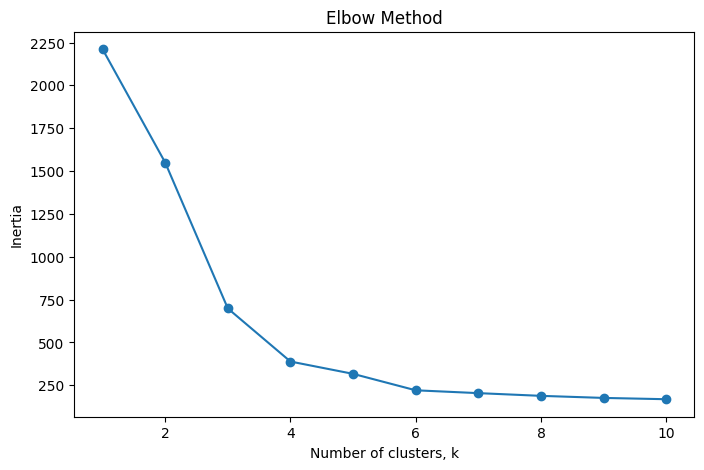

In [12]:
# Suoritetaan k-Means eri klusterimäärillä
inertias = []
K = range(1, 11)  # Testataan klusterimäärät 1-10
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(penguins_preprocessed)
    inertias.append(kmeans.inertia_)

# Piirretään kyynärpääkaavio
plt.figure(figsize=(8, 5))
plt.plot(K, inertias, marker='o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

## Run the k-means clustering algorithm


In [25]:
optimal_k = 4  # Esimerkki: vaihda tämä löytämääsi arvoon

# Suoritetaan k-Means klusterointi
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(penguins_preprocessed)

# Tallennetaan klusterit datan yhteyteen
penguins_preprocessed['Cluster'] = clusters

# Tarkastellaan klustereita
print(penguins_preprocessed.head())
print(penguins_preprocessed['Cluster'].value_counts())

   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  \
0         -0.905520         0.793126          -1.428125    -0.569709   
1         -0.831938         0.128503          -1.071522    -0.507579   
2         -0.684775         0.435252          -0.429637    -1.191006   
3         -1.347011         1.099875          -0.572278    -0.942487   
4         -0.868729         1.764498          -0.786240    -0.693968   

   sex_FEMALE  sex_MALE  Cluster  
0   -0.991031  0.997001        0  
1    1.009050 -1.003008        2  
2    1.009050 -1.003008        2  
3    1.009050 -1.003008        2  
4   -0.991031  0.997001        0  
Cluster
2    107
0    106
3     61
1     59
Name: count, dtype: int64


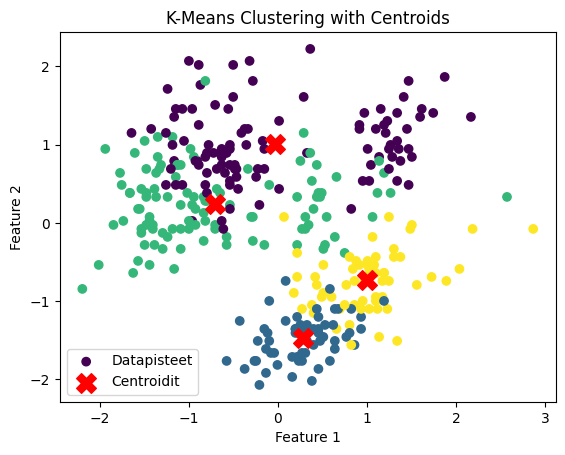

In [26]:
# Esimerkki 2D-visualisoinnista, valitaan kaksi ensimmäistä muuttujaa
plt.scatter(penguins_preprocessed.iloc[:, 0], 
            penguins_preprocessed.iloc[:, 1], 
            c=clusters, cmap='viridis', marker='o', label='Datapisteet')

# Klusterikeskukset (centroids) - piirretään punaisina x-merkkeinä
centroids = kmeans.cluster_centers_

# Piirretään centroidit (klusterikeskukset) punaisella värillä
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroidit')

plt.title('K-Means Clustering with Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()
